Tesla Stock Data (first 5 rows):
                       Date      Open      High       Low     Close  \
0 2010-06-29 00:00:00-04:00  1.266667  1.666667  1.169333  1.592667   
1 2010-06-30 00:00:00-04:00  1.719333  2.028000  1.553333  1.588667   
2 2010-07-01 00:00:00-04:00  1.666667  1.728000  1.351333  1.464000   
3 2010-07-02 00:00:00-04:00  1.533333  1.540000  1.247333  1.280000   
4 2010-07-06 00:00:00-04:00  1.333333  1.333333  1.055333  1.074000   

      Volume  Dividends  Stock Splits  
0  281494500        0.0           0.0  
1  257806500        0.0           0.0  
2  123282000        0.0           0.0  
3   77097000        0.0           0.0  
4  103003500        0.0           0.0  
Tesla Revenue Data (last 5 rows):
                           Date  Revenue
4 1970-01-01 00:00:00.000002020  31536.0
3 1970-01-01 00:00:00.000002021  53823.0
2 1970-01-01 00:00:00.000002022  81462.0
1 1970-01-01 00:00:00.000002023  96773.0
0 1970-01-01 00:00:00.000002024  97690.0
GameStop Stock Data 

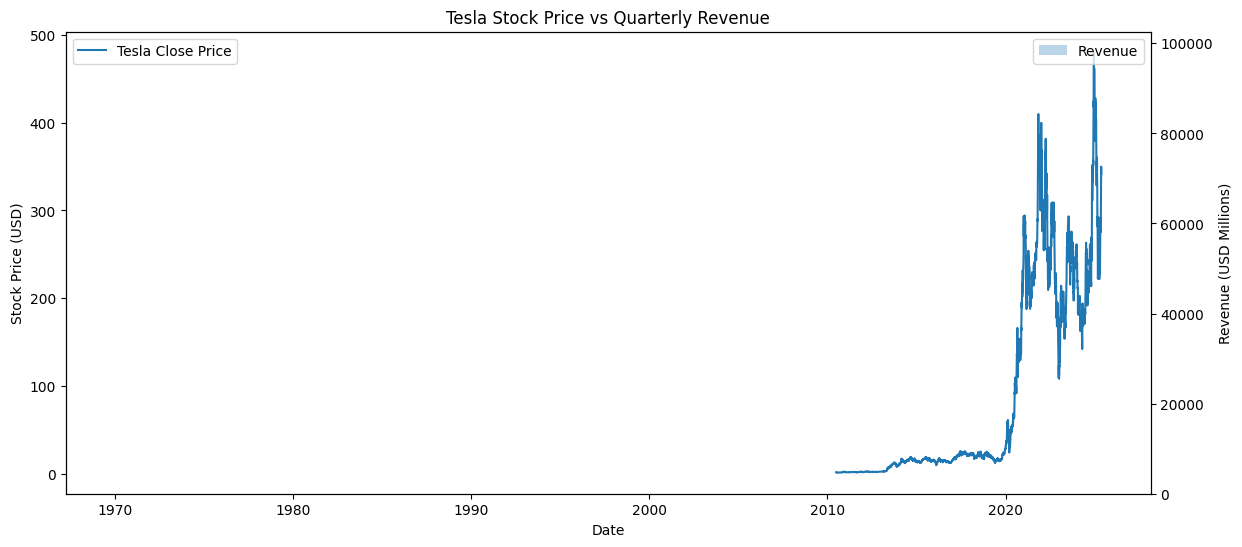

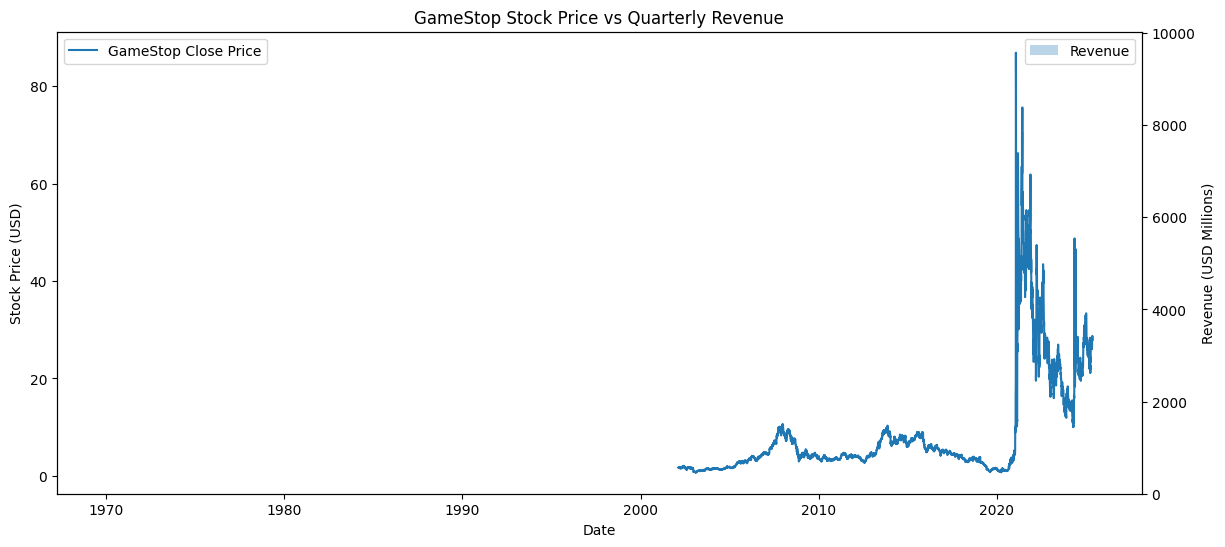

In [10]:
import yfinance as yf
import pandas as pd
import requests
from io import StringIO
import matplotlib.pyplot as plt

tesla_ticker = yf.Ticker("TSLA")
tesla_data = tesla_ticker.history(period="max")
# Reset index and display head
tesla_data.reset_index(inplace=True)
print("Tesla Stock Data (first 5 rows):")
print(tesla_data.head())

In [ ]:
url_tesla_rev = "https://www.macrotrends.net/stocks/charts/TSLA/tesla/revenue"
headers = {"User-Agent": "Mozilla/5.0"}
response = requests.get(url_tesla_rev, headers=headers)
# Wrap HTML string for pandas
html_io = StringIO(response.text)
all_tables = pd.read_html(html_io)
# Identify the revenue table by header containing 'Revenue'
for table in all_tables:
    cols = table.columns.tolist()
    if len(cols) >= 2 and 'revenue' in cols[1].lower():
        tesla_revenue = table.iloc[:, :2].copy()
        tesla_revenue.columns = ['Date', 'Revenue']
        break
# Clean and convert revenue to numeric
tesla_revenue['Revenue'] = (
    tesla_revenue['Revenue']
    .astype(str)
    .str.replace('[\$,]', '', regex=True)
    .replace('', pd.NA)
    .dropna()
    .astype(float)
)
tesla_revenue['Date'] = pd.to_datetime(tesla_revenue['Date'])
# Sort by date
tesla_revenue.sort_values('Date', inplace=True)
print("Tesla Revenue Data (last 5 rows):")
print(tesla_revenue.tail())

In [ ]:
gme_ticker = yf.Ticker("GME")
gme_data = gme_ticker.history(period="max")
gme_data.reset_index(inplace=True)
print("GameStop Stock Data (first 5 rows):")
print(gme_data.head())

In [ ]:
url_gme_rev = "https://www.macrotrends.net/stocks/charts/GME/gamestop/revenue"
response = requests.get(url_gme_rev, headers=headers)
html_io = StringIO(response.text)
all_tables = pd.read_html(html_io)
for table in all_tables:
    cols = table.columns.tolist()
    if len(cols) >= 2 and 'revenue' in cols[1].lower():
        gme_revenue = table.iloc[:, :2].copy()
        gme_revenue.columns = ['Date', 'Revenue']
        break
# Clean and convert revenue
gme_revenue['Revenue'] = (
    gme_revenue['Revenue']
    .astype(str)
    .str.replace('[\$,]', '', regex=True)
    .replace('', pd.NA)
    .dropna()
    .astype(float)
)
gme_revenue['Date'] = pd.to_datetime(gme_revenue['Date'])
gme_revenue.sort_values('Date', inplace=True)
print("GameStop Revenue Data (last 5 rows):")
print(gme_revenue.tail())

In [ ]:
def make_graph(stock_data: pd.DataFrame,
               revenue_data: pd.DataFrame,
               stock_col: str,
               revenue_col: str,
               company: str):
    """
    Plots stock closing price and revenue over time on two axes.
    """
    fig, ax1 = plt.subplots(figsize=(14, 6))
    ax1.plot(stock_data['Date'], stock_data[stock_col], label=f'{company} Close Price')
    ax1.set_xlabel('Date')
    ax1.set_ylabel('Stock Price (USD)')

    ax2 = ax1.twinx()
    ax2.bar(revenue_data['Date'], revenue_data[revenue_col], alpha=0.3, label='Revenue')
    ax2.set_ylabel('Revenue (USD Millions)')

    plt.title(f'{company} Stock Price vs Quarterly Revenue')
    ax1.legend(loc='upper left')
    ax2.legend(loc='upper right')
    plt.show()

# Tesla Dashboard
make_graph(tesla_data, tesla_revenue, 'Close', 'Revenue', 'Tesla')

# GameStop Dashboard
make_graph(gme_data, gme_revenue, 'Close', 'Revenue', 'GameStop')